###  获取并修改像素值

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

In [2]:
def imdisp(img,winName):
    cv2.namedWindow(winName,cv2.WINDOW_NORMAL)
    cv2.imshow(winName,img) 
    cv2.waitKey(0)
    cv2.destroyWindow(winName)
    

In [52]:
img=cv2.imread('../images/yaorenmao.jpeg')
imdisp(img,'original')

#### 获取一个区域

In [55]:
ima=copy.deepcopy(img) # 直接ima=img是浅拷贝
### 获取修改pixel BGR
px=ima[100 ,100,0]
print(px)

d=200
s=100
px=ima[s:s+d ,s:s+d]
#print(px)


newPx=np.array([255,0,0]*d**2)
ima[s:s+d ,s:s+d]=newPx.reshape(d,d,3)
imdisp(ima,'set %d-%d blue'%(d,s))


247


#### 获取单个点，用item更快

In [56]:
ima=copy.deepcopy(img)
ima.item(100,100,1)
ima.itemset((100,100,1),100) # 设置
print(ima.item(100,100,1))

100


#### 获取图像属性
行，列，通道，图像数据类型，像素数目
<font color='red'> 特别注意 dtype, 在opencv中经常数据类型不一致</font>

In [59]:
print('img.shape:\t', img.shape)
print('img.size:\t', img.size)
print('img.dtype:\t', img.dtype)

img.shape:	 (600, 960, 3)
img.size:	 1728000
img.dtype:	 uint8


#### 通道拆分
**split比较耗时，如非必要，不要采用，用numpy[:::], 就用numpy**

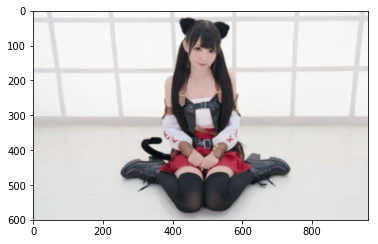

In [71]:
b,g,r=cv2.split(img)
ima=cv2.merge([r,g,b])# 合并
plt.imshow(ima,interpolation='bicubic')
plt.show()

In [63]:
help(cv2.merge)

Help on built-in function merge:

merge(...)
    merge(mv[, dst]) -> dst
    .   @overload
    .   @param mv input vector of matrices to be merged; all the matrices in mv must have the same
    .   size and the same depth.
    .   @param dst output array of the same size and the same depth as mv[0]; The number of channels will
    .   be the total number of channels in the matrix array.



### 为图像扩边（填充）
图像补边，可以用在 fft中**cv2.copyMakeBorder()**
- src 输入图像
-  top, bottom, left, right 对应边界的像素数目。
-  borderType 要添加那种类型的边界，类型如下  
    cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要下一个参数（value）。  
    cv2.BORDER_REFLECT 边界元素的镜像。比如: fedcba|abcdefgh|hgfedcb  
    cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT跟上面一样，但稍作改动。例如: gfedcb|abcdefgh|gfedcba  
    cv2.BORDER_REPLICATE 重复最后一个元素。例如: aaaaaa|abcdefgh|hhhhhhh  
    cv2.BORDER_WRAP 不知道怎么说了, 就像这样: cdefgh|abcdefgh|abcdefg  
- value 边界颜色，如果边界的类型是 cv2.BORDER_CONSTANT


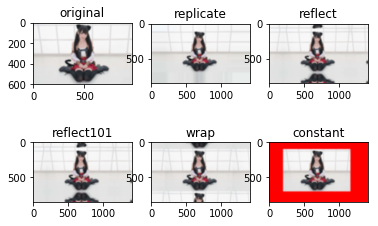

In [95]:
b,g,r=cv2.split(img)
ima=cv2.merge([r,g,b])# 合并
replicate = cv2.copyMakeBorder(ima,100,150,200,250,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(ima,100,150,200,250,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(ima,100,150,200,250,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(ima,100,150,200,250,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(ima,100,150,200,250,cv2.BORDER_CONSTANT,value=[255,0,0])

plt.subplot(231),  plt.imshow(ima,interpolation='bicubic'),  plt.title('original')
plt.subplot(232),  plt.imshow(replicate,interpolation='bicubic'),  plt.title('replicate')
plt.subplot(233),  plt.imshow(reflect,interpolation='bicubic'),  plt.title('reflect')
plt.subplot(234),  plt.imshow(reflect101,interpolation='bicubic'),  plt.title('reflect101')
plt.subplot(235),  plt.imshow(wrap,interpolation='bicubic'),  plt.title('wrap')
plt.subplot(236),  plt.imshow(constant,interpolation='bicubic'),  plt.title('constant')
plt.show()

### 图像加法  
会改变图片的颜色  

注意：  
**OpenCV 中的加法与 Numpy 的加法是有所不同的。 OpenCV 的加法是一种饱和操作，而 Numpy 的加法是一种取模操作。**  
<font size="6" color="red">尽量用cv2.add</font>

In [96]:
x = np.uint8([250])
y=np.uint8([10])
print(cv2.add(x,y)) # 250+10 = 260 => 255
print(x+y)              # 250+10 = 260 % 256 = 4

[[255]]
[4]


In [119]:
img1=cv2.imread('../images/xxb.jpg')# 1920*1080血小板
img2=cv2.imread('../images/yrm.jpg')# 1920*1080 咬人猫
sImg=cv2.imread('../images/xuexiaoban.jpg')#499*761 血小板

In [117]:
addIma=img1+img2
imdisp(addIma,'numpy add')

In [116]:
addIma=cv2.add(img1,img2)
imdisp(addIma,'cv2.add')

加权相加  (混合)  
产生透明效果  
**cv2.addWeighted
$$dst = α · img1 + β · img2 + γ$$**

In [115]:
weightIma=cv2.addWeighted(img1,0.5,img2,0.5,0)
imdisp(weightIma,'weightIma')

### 按位运算
AND， OR， NOT， XOR  
选择非矩形 ROI 

In [173]:
# create a ROI
ima1=copy.deepcopy(img1)
rows,cols,channels =sImg.shape
roi = ima1[0:rows, 0:cols ]

img2gray = cv2.cvtColor(sImg,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 254,255, cv2.THRESH_BINARY)# select 高于254为1， 保留的部分为0
mask_inv = cv2.bitwise_not(mask)# reverse mask

# Now black-out the area of logo in ROI
# 取 roi 中与 mask 中不为零的值对应的像素的值，其他值为 0
# 注意这里必须有 mask=mask 或者 mask=mask_inv, 其中的 mask= 不能忽略
img1_bg = cv2.bitwise_and(roi,roi,mask = mask) # 大图中ROI置0
# 取 roi 中与 mask_inv 中不为零的值对应的像素的值，其他值为 0。
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(sImg,sImg,mask = mask_inv)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
ima1[0:rows, 0:cols ] = dst
imdisp(ima1 ,'ret')



In [175]:
rows

761